In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
file_path = 'cleaned_products.csv'
df = pd.read_csv(file_path)

In [31]:
bool_columns = ['DairyProduct_IsUnderVeterinaryControl', 'DairyProduct_IsShelfLifeUpTo40Days', 'DairyProduct_IsInfantNutrition']
df["DairyProduct_IsUnderVeterinaryControl"].head()
for col in bool_columns:
    df[col] = df[col].map({'True': True, 'False': False, 'TRUE': True, 'FALSE': False, True: True, False: False})

In [32]:
df.head()

,DairyProduct_PackagingType,Quantity_Value,DairyProduct_IsInfantNutrition,SubBrandRu,Mass_Net,DairyProduct_ManufacturerTaxIdentifier,DairyProduct_IsUnderVeterinaryControl,DairyProduct_IsShelfLifeUpTo40Days,EnergyValueKJ,Manufacturer_Name,...,FunctionNameRu,Protein,StorageConditions_MinStorageTemperature,GTIN,GpcClass4,StorageConditions_MinRelativeHumidity,Grease,Manufacturer_GLN,Quantity_Unit,ProductType
0,ПАКЕТ,1952,False,Детское,1933,123456789,False,True,163.30,Молочные горки,...,Сыр,1.40,3,481291141872136,10000025,9,3.63,4810000000017,GR,Consumer unit [CU]
1,ТЕРМОУСАДОЧНАЯ/УСАДОЧНАЯ УПАКОВКА,1561,False,Ягодное,1525,123456789,True,False,287.83,Калинковичский МК,...,Творог,1.91,2,481613805072946,10000025,18,4.95,4810000000013,GR,Consumer unit [CU]
2,ПАКЕТ,1985,False,Натуральное,1965,123456789,False,False,150.90,Бабушкина крынка,...,Масло,4.40,6,481289108417644,10000025,49,1.26,4810000000003,GR,Consumer unit [CU]
3,ТЕРМОУСАДОЧНАЯ/УСАДОЧНАЯ УПАКОВКА,1315,False,Фитнес,1291,123456789,True,False,344.94,Молочный Мир,...,Сыр,3.60,9,481405364645368,10000025,27,3.04,4810000000004,GR,Consumer unit [CU]
4,БАНКА НЕМЕТАЛЛИЧЕСКАЯ,1491,False,Классическое,1460,123456789,True,False,374.80,Молочный Мир,...,Йогурт,4.82,3,481390231144508,10000025,14,2.80,4810000000004,GR,Consumer unit [CU]


C:\Users\kochu\AppData\Local\Temp\ipykernel_12492\2623359217.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis')


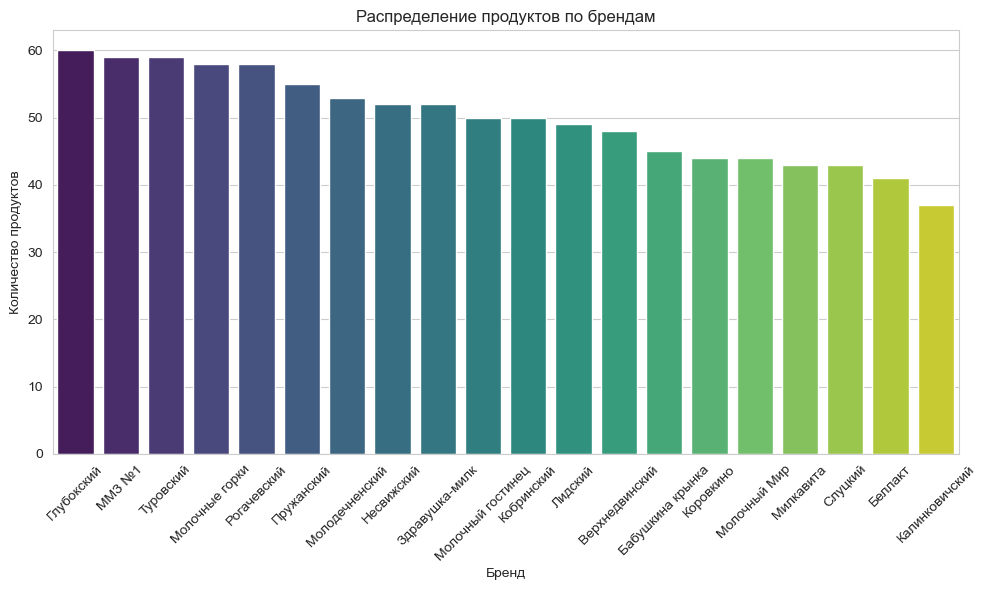

In [33]:
brand_counts = df['BrandRu'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis')
plt.title('Распределение продуктов по брендам')
plt.xlabel('Бренд')
plt.ylabel('Количество продуктов')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

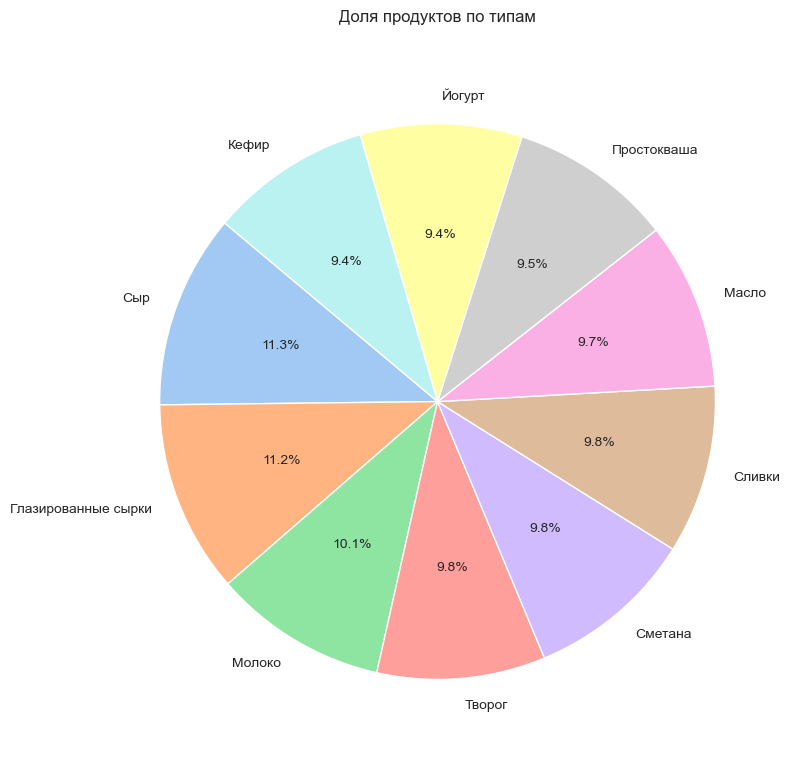

In [34]:
product_type_counts = df['DairyProduct_Type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(product_type_counts, labels=product_type_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Доля продуктов по типам')
plt.axis('equal')
plt.tight_layout()
plt.show()

C:\Users\kochu\AppData\Local\Temp\ipykernel_12492\261309490.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=manufacturer_country_counts.index, y=manufacturer_country_counts.values, palette='Set2')


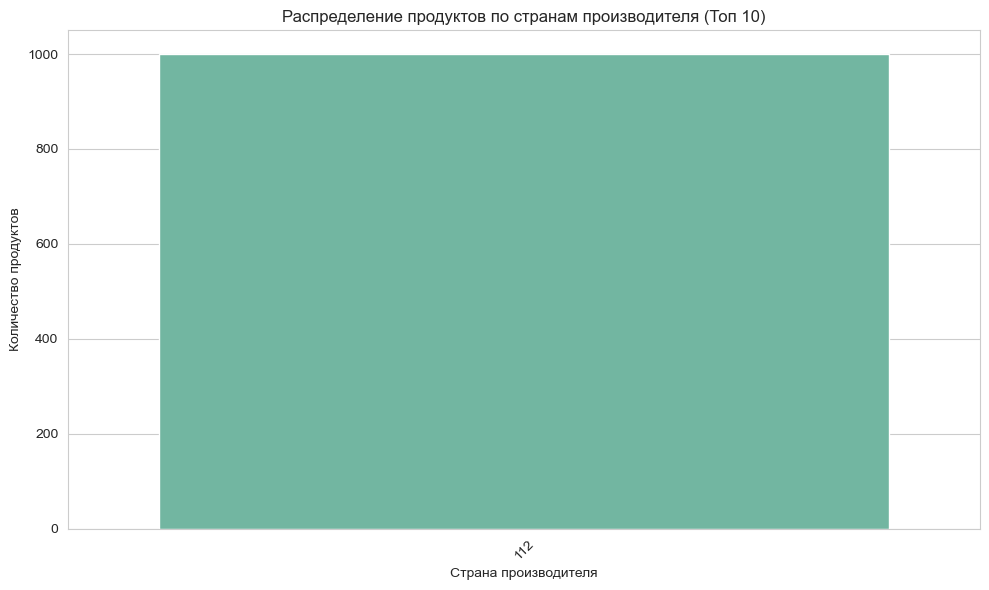

In [35]:
manufacturer_country_counts = df['DairyProduct_ManufacturerCountry'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=manufacturer_country_counts.index, y=manufacturer_country_counts.values, palette='Set2')
plt.title('Распределение продуктов по странам производителя (Топ 10)')
plt.xlabel('Страна производителя')
plt.ylabel('Количество продуктов')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\kochu\AppData\Local\Temp\ipykernel_12492\879637877.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=packaging_type_counts.index, y=packaging_type_counts.values, palette='Set3')


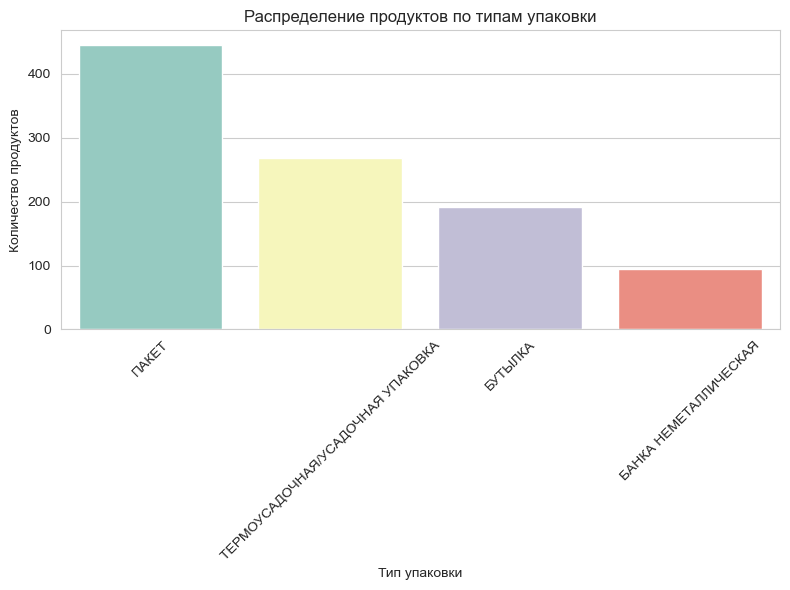

In [36]:
packaging_type_counts = df['DairyProduct_PackagingType'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=packaging_type_counts.index, y=packaging_type_counts.values, palette='Set3')
plt.title('Распределение продуктов по типам упаковки')
plt.xlabel('Тип упаковки')
plt.ylabel('Количество продуктов')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

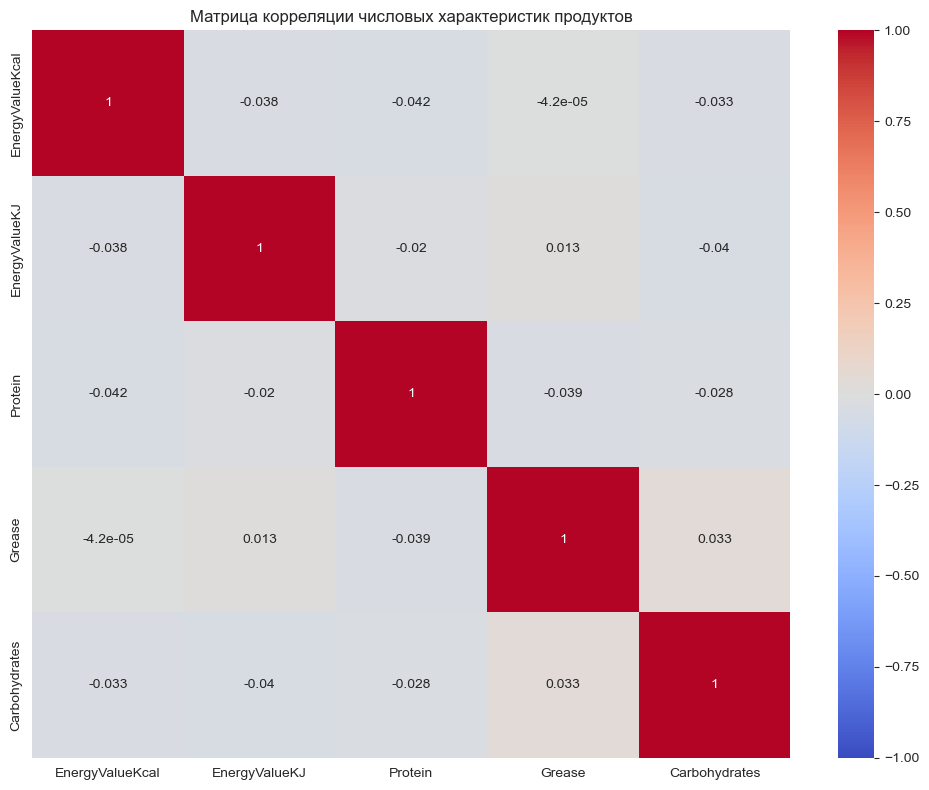

In [37]:
numerical_cols = ['EnergyValueKcal', 'EnergyValueKJ', 'Protein', 'Grease', 'Carbohydrates']
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Матрица корреляции числовых характеристик продуктов')
plt.tight_layout()
plt.show()

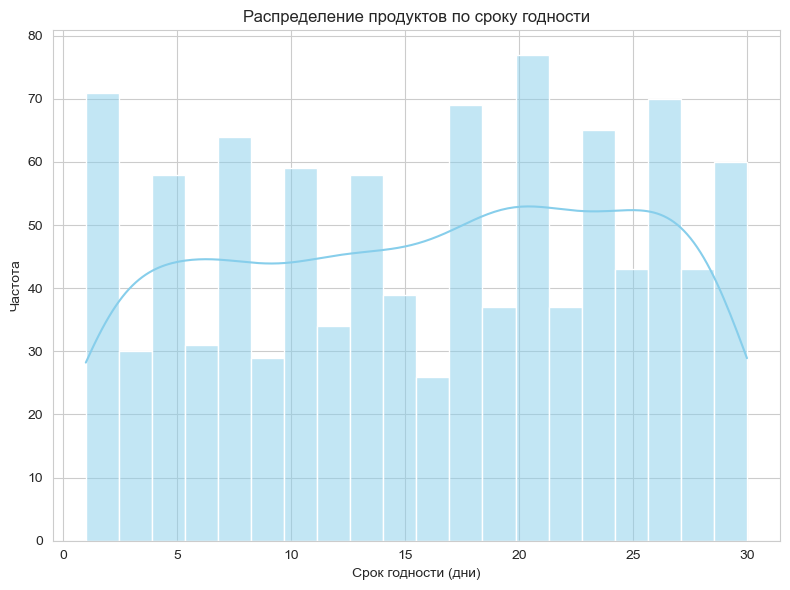

In [38]:
plt.figure(figsize=(8, 6))
sns.histplot(df['StorageConditions_ShelfLife'], bins=20, kde=True, color='skyblue')
plt.title('Распределение продуктов по сроку годности')
plt.xlabel('Срок годности (дни)')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

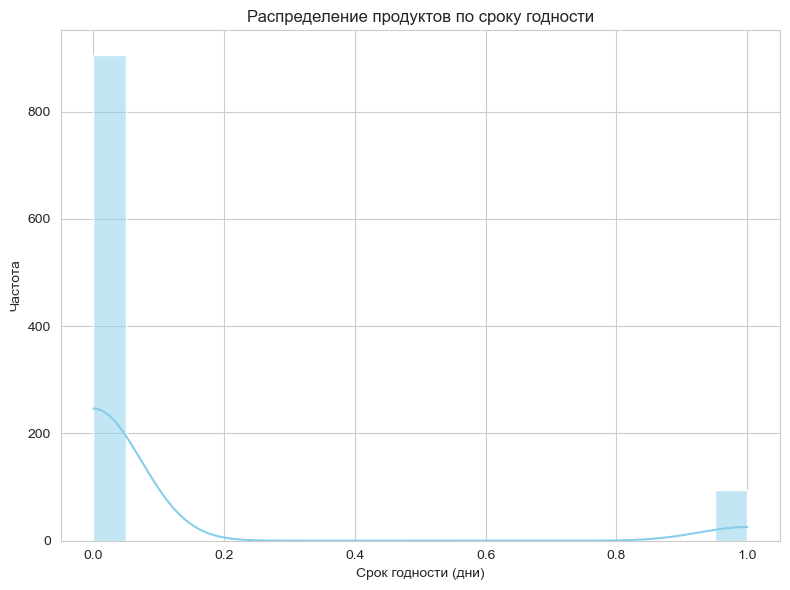

In [39]:
plt.figure(figsize=(8, 6))
sns.histplot(df['DairyProduct_IsShelfLifeUpTo40Days'], bins=20, kde=True, color='skyblue')
plt.title('Распределение продуктов по сроку годности')
plt.xlabel('Срок годности (дни)')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

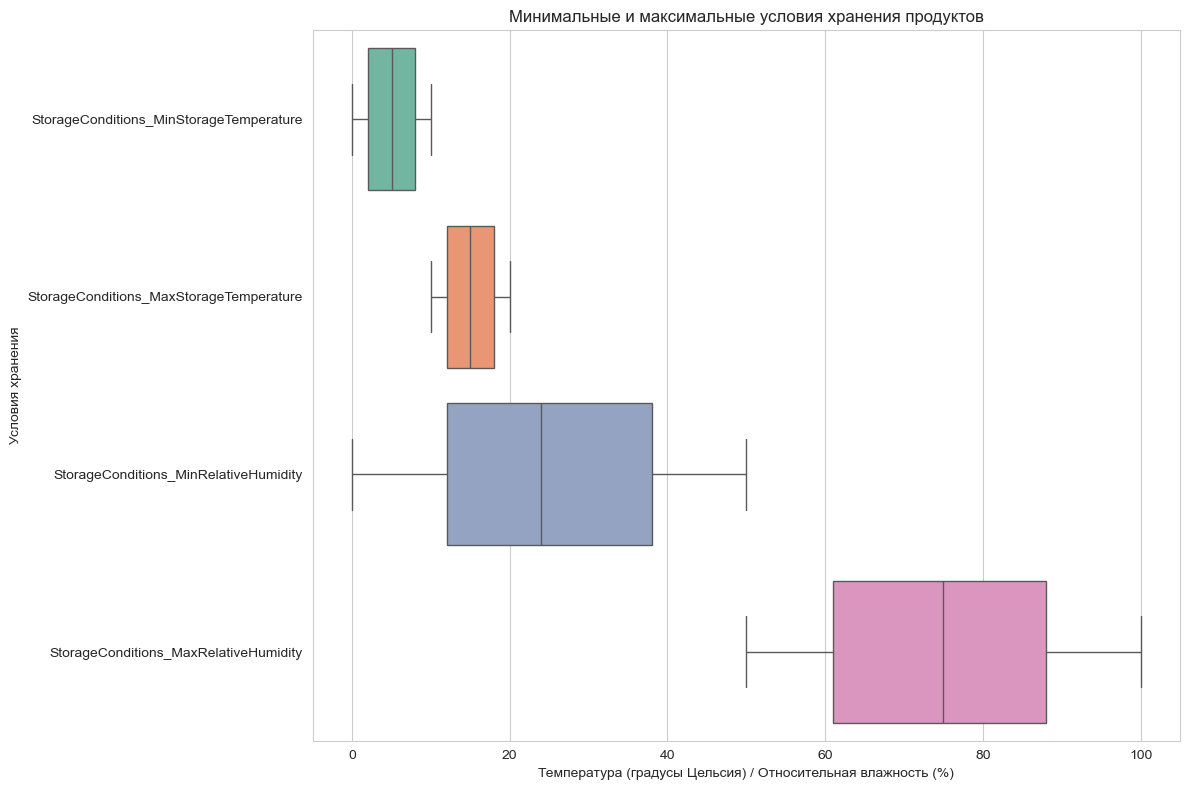

In [40]:
conditions = df[['StorageConditions_MinStorageTemperature', 'StorageConditions_MaxStorageTemperature',
                 'StorageConditions_MinRelativeHumidity', 'StorageConditions_MaxRelativeHumidity']]

plt.figure(figsize=(12, 8))
sns.boxplot(data=conditions, orient='h', palette='Set2')
plt.title('Минимальные и максимальные условия хранения продуктов')
plt.xlabel('Температура (градусы Цельсия) / Относительная влажность (%)')
plt.ylabel('Условия хранения')
plt.tight_layout()
plt.show()

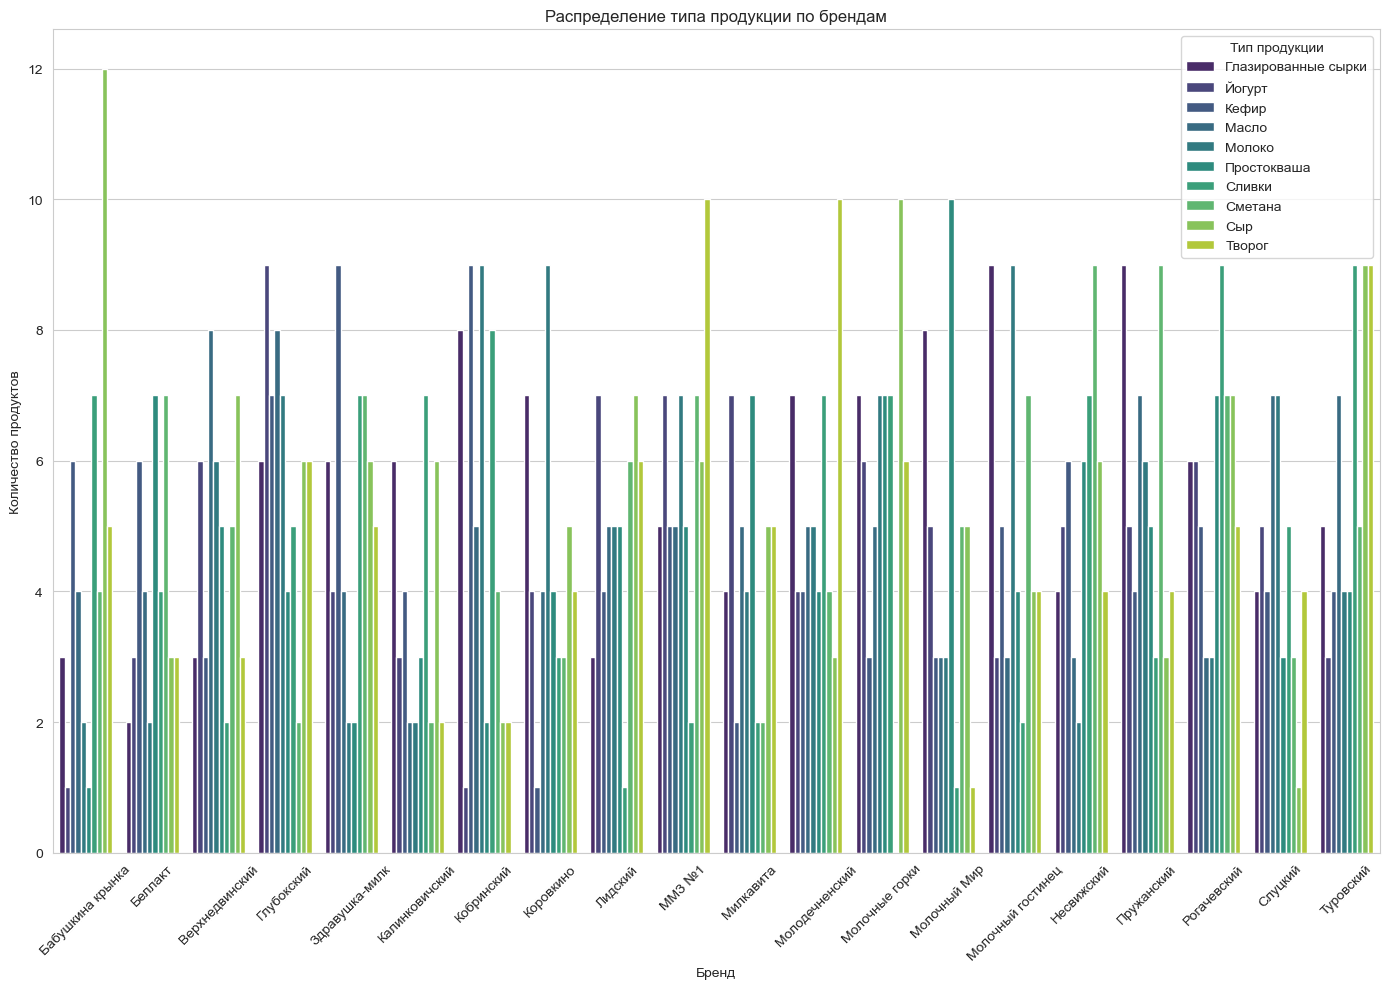

In [41]:
brand_product_counts = df.groupby(['BrandRu', 'DairyProduct_Type']).size().reset_index(name='Counts')

plt.figure(figsize=(14, 10))
sns.barplot(x='BrandRu', y='Counts', hue='DairyProduct_Type', data=brand_product_counts, palette='viridis')
plt.title('Распределение типа продукции по брендам')
plt.xlabel('Бренд')
plt.ylabel('Количество продуктов')
plt.xticks(rotation=45)
plt.legend(title='Тип продукции')
plt.tight_layout()
plt.show()

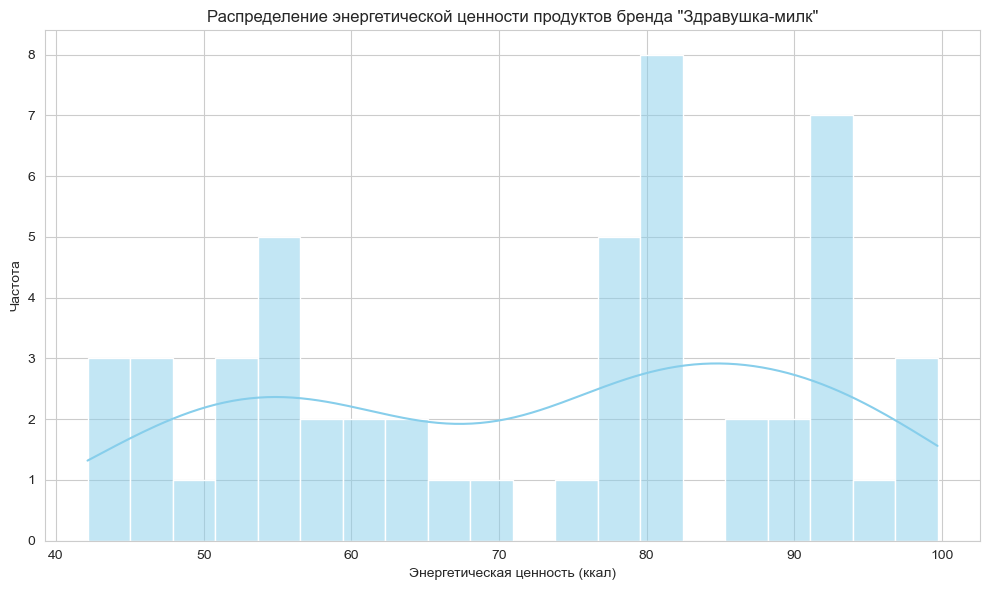

In [77]:
brand_df = df[df['BrandRu'] == 'Здравушка-милк']

plt.figure(figsize=(10, 6))
sns.histplot(brand_df['EnergyValueKcal'], bins=20, kde=True, color='skyblue')
plt.title('Распределение энергетической ценности продуктов бренда "Здравушка-милк"')
plt.xlabel('Энергетическая ценность (ккал)')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

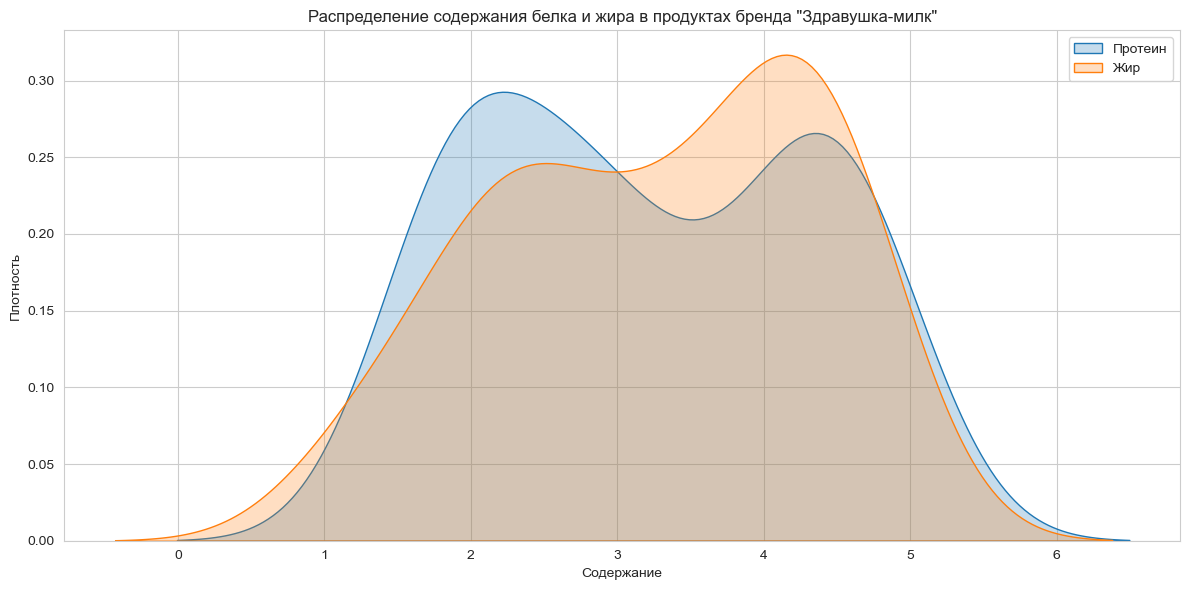

In [74]:

plt.figure(figsize=(12, 6))
sns.kdeplot(brand_df['DairyProduct_ProteinContent'], label='Протеин', fill=True)
sns.kdeplot(brand_df['DairyProduct_FatContent'], label='Жир', fill=True)
plt.title('Распределение содержания белка и жира в продуктах бренда "Здравушка-милк"')
plt.xlabel('Содержание')
plt.ylabel('Плотность')
plt.legend()
plt.tight_layout()
plt.show()

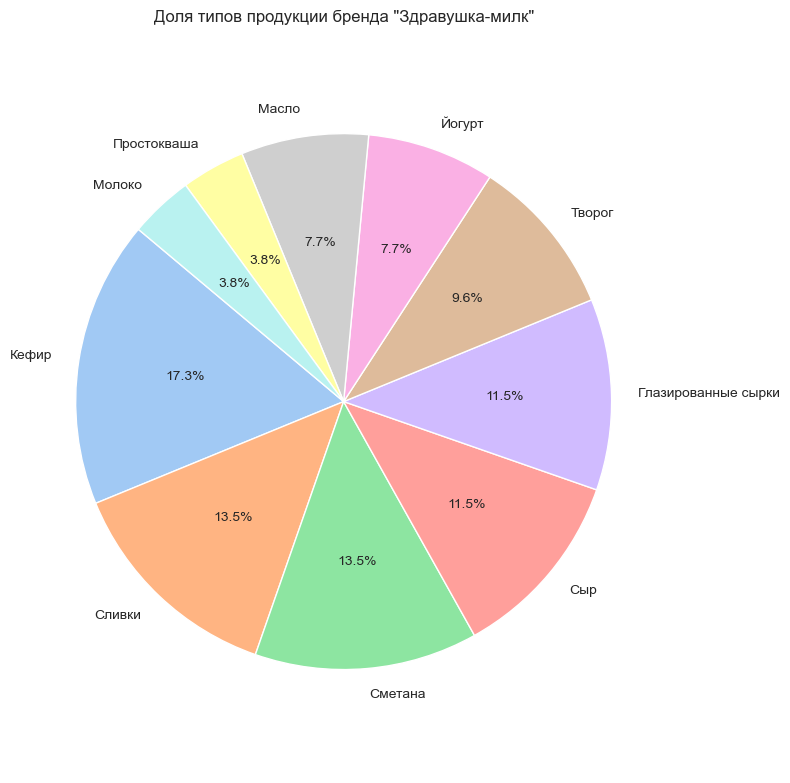

In [75]:

product_type_counts = brand_df['DairyProduct_Type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(product_type_counts, labels=product_type_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Доля типов продукции бренда "Здравушка-милк"')
plt.axis('equal')
plt.tight_layout()
plt.show()

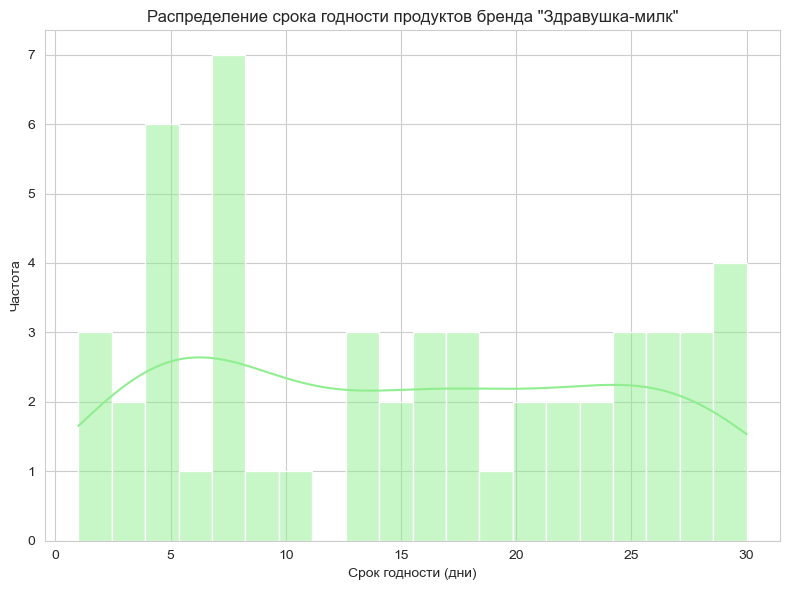

In [76]:

plt.figure(figsize=(8, 6))
sns.histplot(brand_df['StorageConditions_ShelfLife'], bins=20, kde=True, color='lightgreen')
plt.title('Распределение срока годности продуктов бренда "Здравушка-милк"')
plt.xlabel('Срок годности (дни)')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

C:\Users\kochu\AppData\Local\Temp\ipykernel_12492\415667097.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=packaging_counts.index, y=packaging_counts.values, palette='Set2')


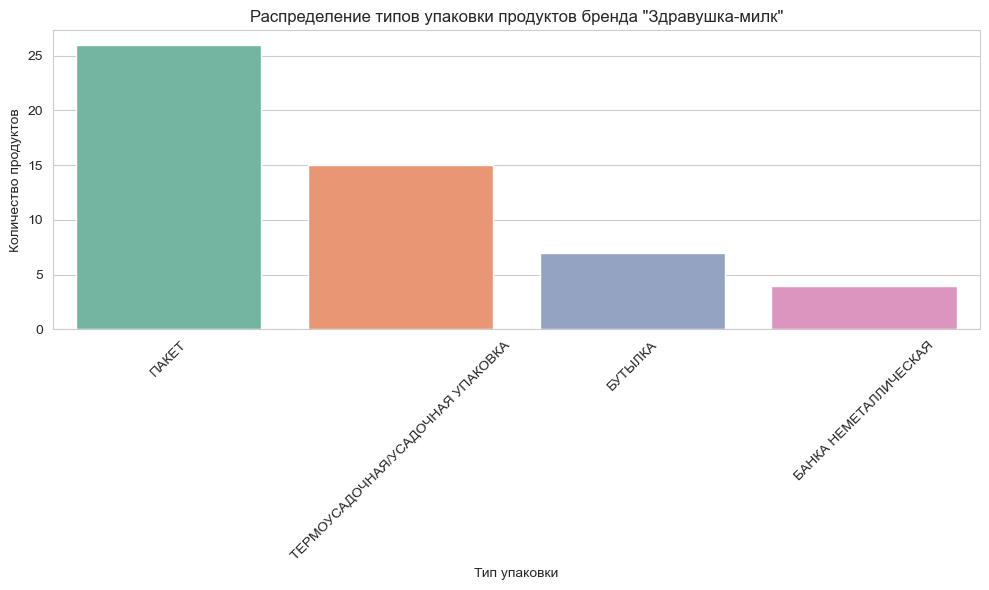

In [78]:

packaging_counts = brand_df['DairyProduct_PackagingType'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=packaging_counts.index, y=packaging_counts.values, palette='Set2')
plt.title('Распределение типов упаковки продуктов бренда "Здравушка-милк"')
plt.xlabel('Тип упаковки')
plt.ylabel('Количество продуктов')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

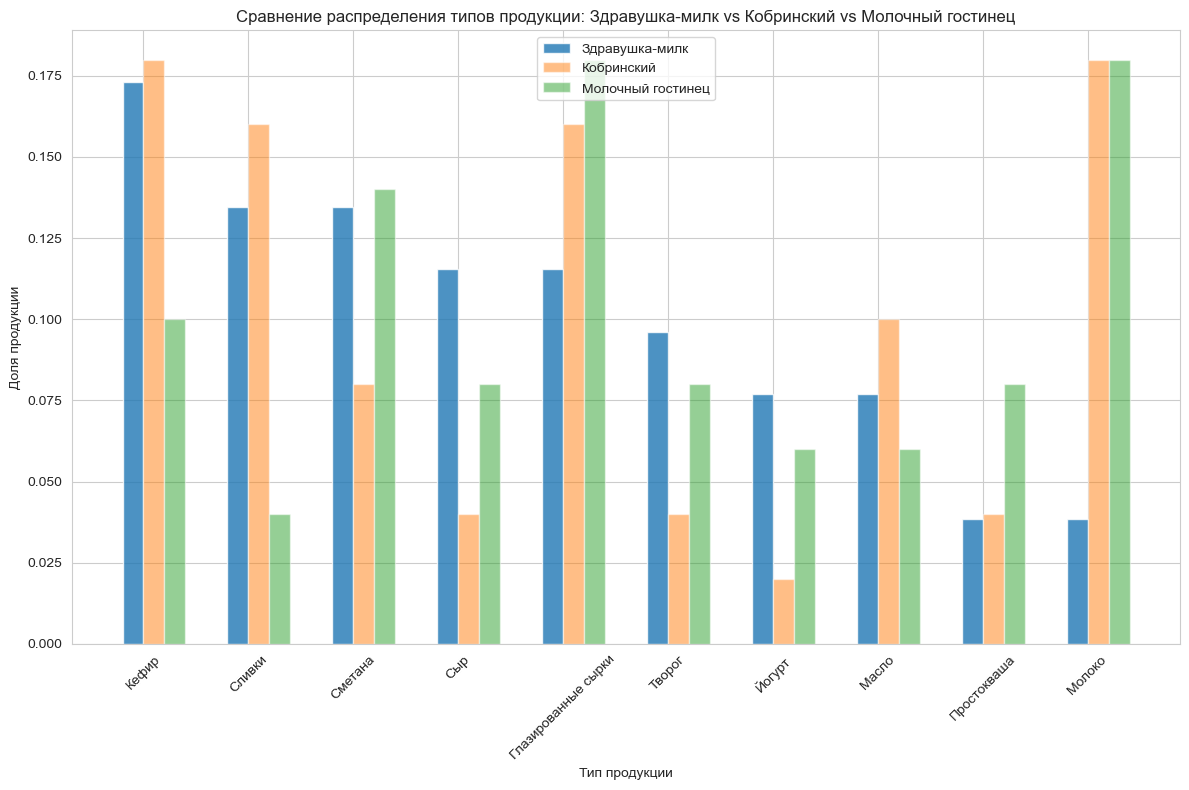

In [56]:
brand1 = 'Здравушка-милк'
brand2 = 'Кобринский'
brand3 = "Молочный гостинец"

brand1_df = df[df['BrandRu'] == brand1]
brand2_df = df[df['BrandRu'] == brand2]
brand3_df = df[df['BrandRu'] == brand3]


brand1_product_type_counts = brand1_df['DairyProduct_Type'].value_counts(normalize=True)
brand2_product_type_counts = brand2_df['DairyProduct_Type'].value_counts(normalize=True)
brand3_product_type_counts = brand3_df['DairyProduct_Type'].value_counts(normalize=True)

plt.figure(figsize=(12, 8))

bar_width = 0.2

brand1_positions = range(len(brand1_product_type_counts))
brand2_positions = [pos + bar_width for pos in brand1_positions]
brand3_positions = [pos + 2*bar_width for pos in brand1_positions]


plt.bar(brand1_positions, brand1_product_type_counts.reindex(brand1_product_type_counts.index).fillna(0).values, width=bar_width, alpha=0.8, label=brand1)

plt.bar(brand2_positions, brand2_product_type_counts.reindex(brand1_product_type_counts.index).fillna(0).values, width=bar_width, alpha=0.5, label=brand2)

plt.bar(brand3_positions, brand3_product_type_counts.reindex(brand1_product_type_counts.index).fillna(0).values, width=bar_width, alpha=0.5, label=brand3)

plt.title(f'Сравнение распределения типов продукции: {brand1} vs {brand2} vs {brand3}')
plt.xlabel('Тип продукции')
plt.ylabel('Доля продукции')
plt.xticks([pos + bar_width / 2 for pos in brand1_positions], brand1_product_type_counts.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

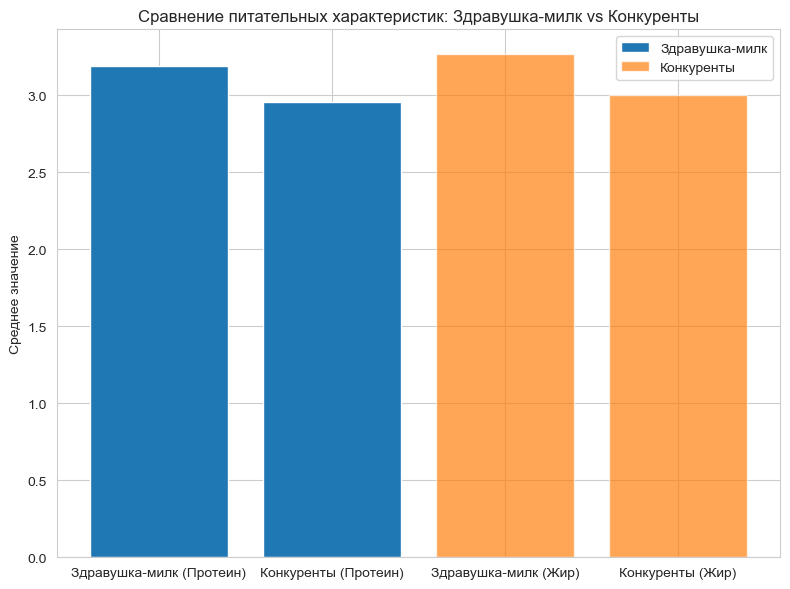

In [59]:
brand_name = 'Здравушка-милк'
brand_df = df[df['BrandRu'] == brand_name]

competitor_df = df[df['BrandRu'] != brand_name]

brand_protein_mean = brand_df['DairyProduct_ProteinContent'].mean()
brand_fat_mean = brand_df['DairyProduct_FatContent'].mean()

competitor_protein_mean = competitor_df['DairyProduct_ProteinContent'].mean()
competitor_fat_mean = competitor_df['DairyProduct_FatContent'].mean()

plt.figure(figsize=(8, 6))
plt.bar([f'{brand_name} (Протеин)', f'Конкуренты (Протеин)'], [brand_protein_mean, competitor_protein_mean], label=brand_name)
plt.bar([f'{brand_name} (Жир)', f'Конкуренты (Жир)'], [brand_fat_mean, competitor_fat_mean], alpha=0.7, label='Конкуренты')
plt.title(f'Сравнение питательных характеристик: {brand_name} vs Конкуренты')
plt.ylabel('Среднее значение')
plt.legend()
plt.tight_layout()
plt.show()

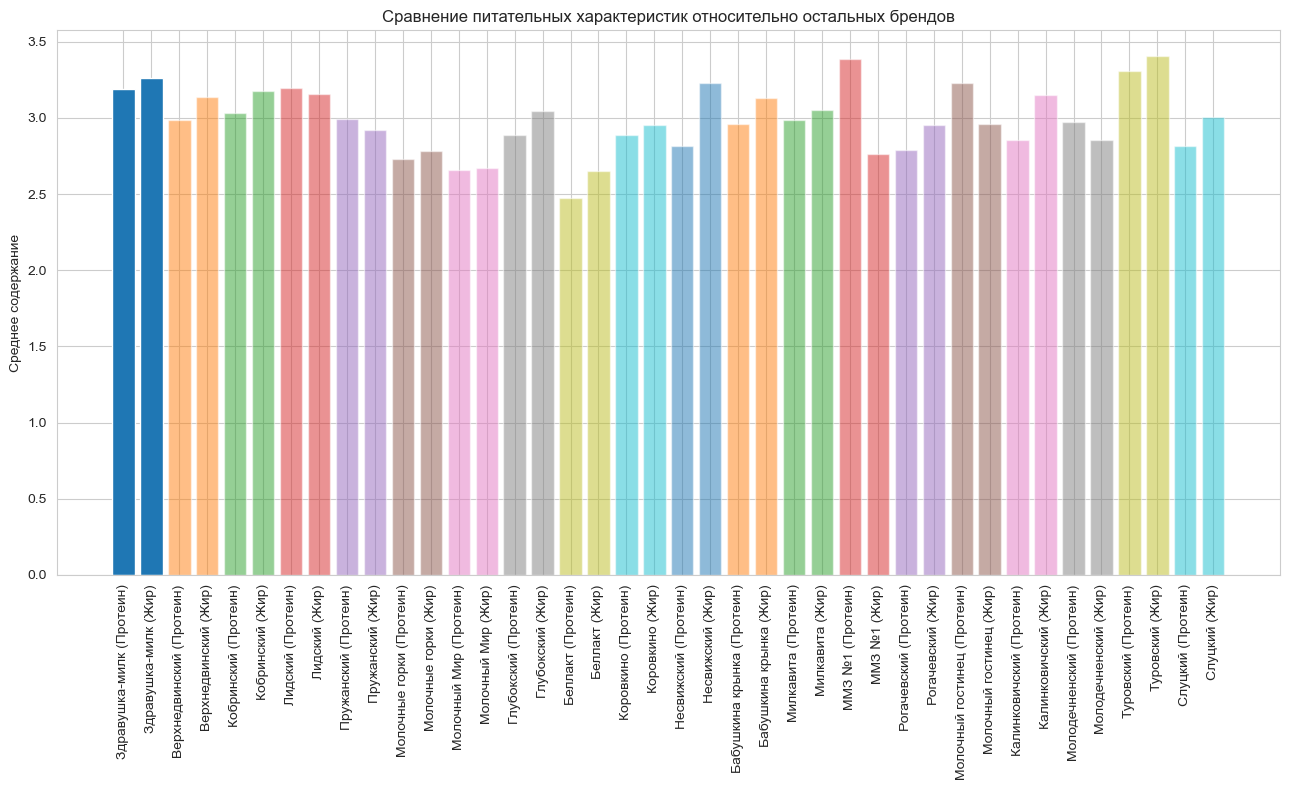

In [72]:
plt.figure(figsize=(13, 8))

brand_protein_mean = brand_df['DairyProduct_ProteinContent'].mean()
brand_fat_mean = brand_df['DairyProduct_FatContent'].mean()
plt.bar([f'{brand_name} (Протеин)', f'{brand_name} (Жир)'], [brand_protein_mean, brand_fat_mean], label=brand_name)

for competitor in competitor_df['BrandRu'].unique():
    competitor_protein_mean = competitor_df[competitor_df['BrandRu'] == competitor]['DairyProduct_ProteinContent'].mean()
    competitor_fat_mean = competitor_df[competitor_df['BrandRu'] == competitor]['DairyProduct_FatContent'].mean()
    plt.bar([f'{competitor} (Протеин)', f'{competitor} (Жир)'], [competitor_protein_mean, competitor_fat_mean], alpha=0.5, label=competitor)

plt.title(f'Сравнение питательных характеристик относительно остальных брендов')
plt.ylabel('Среднее содержание')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()